In [5]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import QuarkTM
import pickle
import matplotlib

import multiprocessing

In [6]:
import QuarkTM_MP

In [7]:
qrange = linspace(0, 5, 51)
erange = linspace(-5, 5, 201)

In [37]:
erange_test = linspace(-5, 5, 1001)

In [9]:
q = Particle(0.5, qrange, erange)

In [10]:
ch = Channel(q, q, 0.2)

In [11]:
ch.populate_T()

In [12]:
iEps = tm.Interpolator(qrange, q.om0(qrange), 'linear')

In [38]:
%%timeit
S0 = array([ch.func(o, 0, ch.T, ch.iImT, q.R, iEps, iEps) for o in erange_test])

815 ms ± 3.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
8.36 / 1.4

5.9714285714285715

In [39]:
%%timeit
with multiprocessing.Pool(14) as p:
    out = p.starmap(tm.sigma_ff_onshell, [[o, 1e-3, ch.T, ch.iImT, q.R, iEps, iEps] for o in erange_test])

246 ms ± 16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
from syntax_sugar import pipe, END
from syntax_sugar import thread_syntax as t, process_syntax as p

In [30]:
NTHR = 14

In [34]:
%%timeit
out = pipe(erange_test) | p[lambda z: tm.sigma_ff_onshell(z, 1e-3, ch.T, ch.iImT, q.R, iEps, iEps)]*(NTHR//1) | END

1.46 s ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
S0_par = tm.get_sigma_ff(erange_test, 0, ch.T, ch.iImT, q.R, iEps, iEps, 0, len(erange_test))

870 ms ± 7.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
S0 = array([ch.func(o, 0, ch.T, ch.iImT, q.R, iEps, iEps) for o in erange_test])

In [12]:
S0_par = tm.get_sigma_ff(erange_test, 0, ch.T, ch.iImT, q.R, iEps, iEps, 0, len(erange_test))

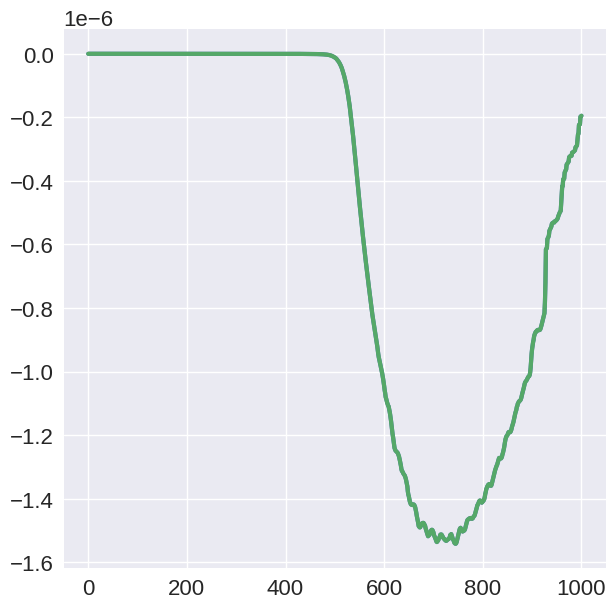

In [13]:
plt.plot(S0)
plt.plot(S0_par)

In [24]:
out = QuarkTM_MP.get_S_test(erange_test, 0.2, ch.iImT, q.R, iEps, iEps)

KeyboardInterrupt: 

In [ ]:
plt.plot(erange_test, out)
plt.plot(erange, ch.ImS[:, 0])